<div style="text-align: center; font-size: 48px;">
AI, Ethics, and Society<br>
Homework Project #4
</div>

<div style="text-align: center; font-size: 24px;">
Dariel J. Carrion<br>
dcarrion6@gatech.edu
</div>


## Task 1 - Step 1: Setup Your Environment
### Install in Terminal:


In [2]:
pip install gensim nltk pandas

Note: you may need to restart the kernel to use updated packages.


## Task 1 - Step 2: Load Pre-trained Model

In [3]:
import gensim
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('reducedvector.bin', binary=True)

## Task 1 - Step 3: Solve Task Set #1

In [4]:
# Word Similarity Task:
# This ranks the 15 words based on their similarity to "man" and "woman" using the following commands:
words = ['wife', 'husband', 'child', 'queen', 'king', 'man', 'woman', 'birth', 'doctor', 'nurse', 'teacher', 'professor', 'engineer', 'scientist', 'president']
similarities_to_man = {word: model.similarity('man', word) for word in words}
similarities_to_woman = {word: model.similarity('woman', word) for word in words}


## Task 1 - Q1: Similarity score

In [5]:
# This stores the results in a table using pandas dataframe
import pandas as pd
df = pd.DataFrame(list(similarities_to_man.items()), columns=['Word', 'Similarity to Man'])
df['Similarity to Woman'] = df['Word'].map(similarities_to_woman)
df


,Word,Similarity to Man,Similarity to Woman
0,wife,0.283479,0.300688
1,husband,0.234116,0.449643
2,child,0.333422,0.589809
3,queen,0.110420,0.228572
4,king,0.264497,0.122529
5,man,1.000000,0.587694
6,woman,0.587694,1.000000
7,birth,0.123439,0.420309
8,doctor,0.289247,0.196134
9,nurse,0.153481,0.254358


## Task 1 - Q2 The Bigger Analogy Test Set (BATS) Word analogy

In [6]:
# Load the BATS analogy file
with open('E05 [name - occupation].txt', 'r') as file:
    rows = file.readlines()

# Preview the rows of the file
for i, row in enumerate(rows[:50]):
    print(f"Row {i}: {row.strip()}")


Row 0: andersen	writer/poet/author
Row 1: aristotle	philosopher
Row 2: balzac	novelist/writer
Row 3: beethoven	composer
Row 4: caesar	emperor/commander/leader
Row 5: columbus	explorer
Row 6: confucius	philosopher
Row 7: dante	poet
Row 8: darwin	naturalist/biologist/geologist
Row 9: depp	actor/producer/musician
Row 10: descartes	mathematician/philosopher
Row 11: dickens	novelist/writer/critic/author
Row 12: edison	inventor/businessman
Row 13: einstein	physicist/scientist
Row 14: euler	mathematician/physicist/astronomer/logician/engineer
Row 15: goethe	poet/playwright/novelist/writer/author
Row 16: hawking	physicist/scientist
Row 17: haydn	composer
Row 18: hegel	philosopher
Row 19: hitler	dictator/politician/nazi
Row 20: hume	philosopher/politician
Row 21: jolie	actress/filmmaker/director/humanitarian/activist
Row 22: kant	philosopher
Row 23: kepler	mathematician/physicist/astronomer/astrologer
Row 24: lincoln	president
Row 25: locke	philosopher
Row 26: marx	philosopher/communist
Row 27:

In [7]:
# Configure pandas to display the full output
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Set the target word
target_word = 'aristotle'

# Iterate through the rows and compute similarity
similarities = []
for row in rows:
    words = row.strip().split()
    for word in words:
        if word != target_word and word in model:
            similarity_score = model.similarity(target_word, word)
            similarities.append((target_word, word, similarity_score))

# Create a DataFrame and drop duplicates
similarity_df = pd.DataFrame(similarities, columns=['Target', 'Word', 'Similarity'])

# Drop duplicate rows
similarity_df_cleaned = similarity_df.drop_duplicates()

# Display the cleaned results
similarity_df_cleaned



,Target,Word,Similarity
0,aristotle,andersen,0.246937
1,aristotle,philosopher,0.472839
2,aristotle,balzac,0.107030
3,aristotle,beethoven,0.146808
4,aristotle,composer,0.006515
5,aristotle,caesar,0.227822
6,aristotle,columbus,-0.028884
7,aristotle,explorer,-0.046544
8,aristotle,confucius,0.400194
10,aristotle,dante,0.362650


In [8]:
# Define three words from a protected class (e.g., religion)
protected_class_words = ['christianity', 'islam', 'buddhism']

# Compute similarity between the target word and protected class words only once
protected_similarities = []
for word in protected_class_words:
    if word in model:
        similarity_score = model.similarity(target_word, word)
        protected_similarities.append((target_word, word, similarity_score))

# Create DataFrame and remove any duplicates (if needed)
protected_similarity_df = pd.DataFrame(protected_similarities, columns=['Target', 'Protected Class Word', 'Similarity'])

# Display the results
protected_similarity_df.drop_duplicates()


,Target,Protected Class Word,Similarity
0,aristotle,christianity,0.335039
1,aristotle,islam,0.247551
2,aristotle,buddhism,0.364475


## Task 1 - Q3 Sentences
1. King is to throne as judge is to court.<br>
2. Giant is to dwarf as genius is to fool.<br>
3. College is to dean as jail is to warden.<br>
4. Arc is to circle as line is to segment.<br>
5. French is to France as Dutch is to Netherlands.<br>
6. Man is to woman as king is to queen.<br>
7. Water is to ice as liquid is to solid.<br>
8. Bad is to good as sad is to happy.<br>
9. Nurse is to hospital as teacher is to school.<br>
10. USA is to pizza as Japan is to sushi.<br>
11. Human is to house as dog is to kennel.<br>
12. Grass is to green as sky is to blue.<br>
13. Video is to cassette as computer is to disk.<br>
14. Universe is to planet as house is to room.<br>
15. Poverty is to wealth as sickness is to health.<br>


## Task 1 - Q3 Sentences Part A

In [13]:
# List of word pairs from your analogies
word_pairs = [
    ('king', 'throne', 'judge', 'court'),
    ('giant', 'dwarf', 'genius', 'fool'),
    ('college', 'dean', 'jail', 'warden'),
    ('arc', 'circle', 'line', 'segment'),
    ('french', 'france', 'dutch', 'netherlands'),
    ('man', 'woman', 'king', 'queen'),
    ('water', 'ice', 'liquid', 'solid'),
    ('bad', 'good', 'sad', 'happy'),
    ('nurse', 'hospital', 'teacher', 'school'),
    ('usa', 'pizza', 'japan', 'sushi'),
    ('human', 'house', 'dog', 'kennel'),
    ('grass', 'green', 'sky', 'blue'),
    ('video', 'cassette', 'computer', 'disk'),
    ('universe', 'planet', 'house', 'room'),
    ('poverty', 'wealth', 'sickness', 'health')
]

# Calculate the similarity between the words in each pair
similarities = []
for pair in word_pairs:
    word1, word2, word3, word4 = pair
    if word1 in model and word2 in model and word3 in model and word4 in model:
        similarity_pair1 = model.similarity(word1, word2)
        similarity_pair2 = model.similarity(word3, word4)
        similarities.append(((word1, word2), similarity_pair1, (word3, word4), similarity_pair2))

# Display results
import pandas as pd
similarity_df = pd.DataFrame(similarities, columns=['Pair 1', 'Similarity 1', 'Pair 2', 'Similarity 2'])
similarity_df


,Pair 1,Similarity 1,Pair 2,Similarity 2
0,"(king, throne)",0.597070,"(judge, court)",0.607786
1,"(giant, dwarf)",0.480748,"(genius, fool)",0.271896
2,"(college, dean)",0.361748,"(jail, warden)",0.277774
3,"(arc, circle)",0.297496,"(line, segment)",0.455113
4,"(french, france)",0.466358,"(dutch, netherlands)",0.419229
5,"(man, woman)",0.587694,"(king, queen)",0.568557
6,"(water, ice)",0.325372,"(liquid, solid)",0.654647
7,"(bad, good)",0.656167,"(sad, happy)",0.448851
8,"(nurse, hospital)",0.428714,"(teacher, school)",0.532657
9,"(usa, pizza)",0.084279,"(japan, sushi)",0.011866


## Task 1 - Q3 Sentences Part B

In [14]:
# List of analogies for Word2Vec to solve
analogy_prompts = [
    ('king', 'woman', 'man'),
    ('giant', 'fool', 'dwarf'),
    ('college', 'warden', 'dean'),
    ('arc', 'segment', 'circle'),
    ('french', 'netherlands', 'france'),
    ('man', 'queen', 'woman'),
    ('water', 'solid', 'ice'),
    ('bad', 'happy', 'good'),
    ('nurse', 'school', 'hospital'),
    ('usa', 'sushi', 'pizza'),
    ('human', 'kennel', 'house'),
    ('grass', 'blue', 'green'),
    ('video', 'disk', 'cassette'),
    ('universe', 'room', 'planet'),
    ('poverty', 'health', 'wealth')
]

# Find the word analogy and similarity score
analogy_results = []
for positive, word2, negative in analogy_prompts:
    result = model.most_similar(positive=[positive, word2], negative=[negative], topn=1)
    analogy_results.append((positive, word2, negative, result[0][0], result[0][1]))

# Display results
analogy_df = pd.DataFrame(analogy_results, columns=['Positive 1', 'Positive 2', 'Negative', 'Result', 'Similarity'])
analogy_df


,Positive 1,Positive 2,Negative,Result,Similarity
0,king,woman,man,queen,0.553245
1,giant,fool,dwarf,crazy,0.510611
2,college,warden,dean,comers,0.386715
3,arc,segment,circle,vcr,0.417574
4,french,netherlands,france,dutch,0.604448
5,man,queen,woman,king,0.563784
6,water,solid,ice,liquid,0.547732
7,bad,happy,good,raeben,0.531818
8,nurse,school,hospital,dropouts,0.507469
9,usa,sushi,pizza,tsn,0.413286


In [15]:
from scipy.stats import pearsonr

# Extract your similarity scores and the model-generated similarity scores
your_scores = similarity_df['Similarity 2'].values
model_scores = analogy_df['Similarity'].values

# Compute Pearson correlation
correlation, _ = pearsonr(your_scores, model_scores)

print(f"Correlation between your scores and Word2Vec's scores: {correlation:.2f}")


Correlation between your scores and Word2Vec's scores: 0.57


### This indicates a .40-.59 “moderate” correlation

## Task Set 2 - Q1

In [21]:
import os
import pandas as pd

# Set the directory where the dataset is located
data_dir = 'UTKface_cropped\crop_part1'

# Extract metadata from the file names
image_data = []
for filename in os.listdir(data_dir):
    try:
        # Extract age, gender, and race from the filename
        age, gender, race = filename.split('_')[:3]
        image_data.append([int(age), int(gender), int(race)])
    except:
        continue

# Create a DataFrame for analysis
df = pd.DataFrame(image_data, columns=['Age', 'Gender', 'Race'])

# Display the first few rows of the dataset
df.head()


,Age,Gender,Race
0,100,1,0
1,100,1,2
2,101,1,2
3,10,0,0
4,10,0,0


## Task Set 2 - Q1 (Compute the Frequency of Images for Each Subgroup)

In [24]:
# Define age groups
age_bins = [0, 20, 40, 60, 80, 116]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-116']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Frequency distribution for each subgroup
age_distribution = df['Age Group'].value_counts()
gender_distribution = df['Gender'].value_counts()
race_distribution = df['Race'].value_counts()

# Display results
print("Age Distribution:\n", age_distribution)
print("\nGender Distribution:\n", gender_distribution)
print("\nRace Distribution:\n", race_distribution)


Age Distribution:
 Age Group
0-20      4267
21-40     2533
41-60     1665
61-80      967
81-116     346
Name: count, dtype: int64

Gender Distribution:
 Gender
1    5406
0    4372
Name: count, dtype: int64

Race Distribution:
 Race
0    5265
2    1553
3    1452
4    1103
1     405
Name: count, dtype: int64


## Task 2 - Q1 Pivot table

In [29]:
# Assuming 'df' is your DataFrame with 'Age', 'Gender', and 'Race' columns
# Define age groups (0-20, 21-40, 41-60, 61+)
age_bins = [0, 20, 40, 60, 200]
age_labels = ['0-20', '21-40', '41-60', '61+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Map gender and race values to more readable labels
gender_map = {0: 'Male', 1: 'Female'}
race_map = {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Unknown'}
df['Gender'] = df['Gender'].map(gender_map)
df['Race'] = df['Race'].map(race_map)

# Create a pivot table to summarize data like in the provided image
pivot_table = pd.pivot_table(df, values='Age', index=['Race'], columns=['Age Group', 'Gender'], aggfunc='count', fill_value=0)

# Calculate totals for rows and columns
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table.loc['Total'] = pivot_table.sum()

# Display the table
pivot_table


Age Group   0-20        21-40       41-60         61+      Total
Gender    Female  Male Female Male Female Male Female Male      
Race                                                            
Asian        496   521    239  110     30   58     55   44  1553
Black         92    68     55   45     39   36     18   52   405
Indian       341   266    448  150     88   74     43   42  1452
Unknown      361   191    267  185     15   73      5    6  1103
White       1036   895    623  411    579  673    576  472  5265
Total       2326  1941   1632  901    751  914    697  616  9778

## Task 2 - Q1 Visualizing the Distributions

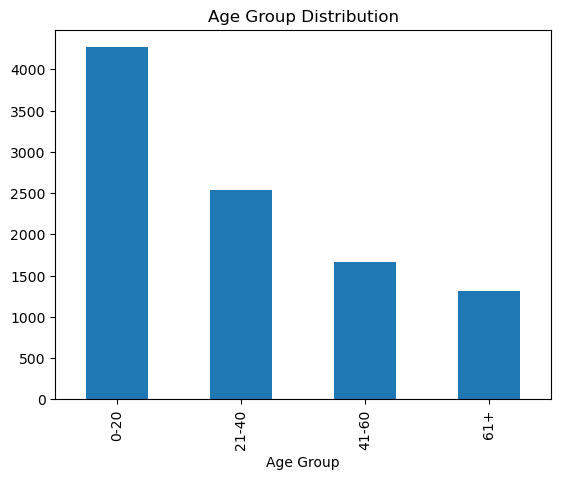

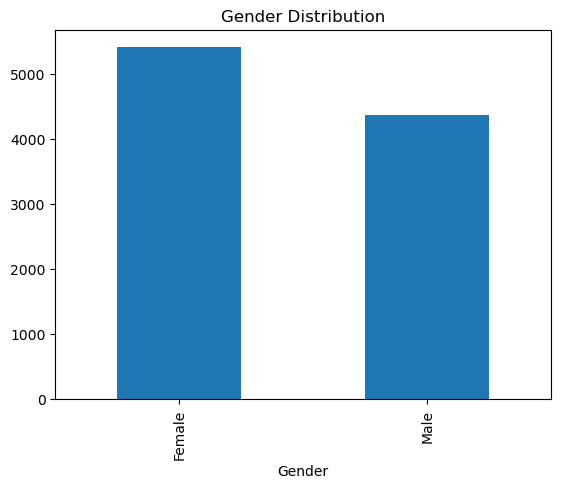

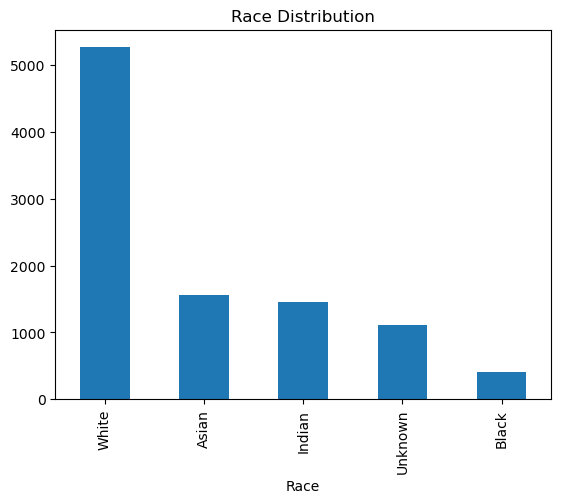

In [30]:
import matplotlib.pyplot as plt

# Age Distribution
df['Age Group'].value_counts().plot(kind='bar', title='Age Group Distribution')
plt.show()

# Gender Distribution
df['Gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()

# Race Distribution
df['Race'].value_counts().plot(kind='bar', title='Race Distribution')
plt.show()
